In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Train DataSet

In [44]:
tweetPath = '/content/drive/MyDrive/interIIT/tweet_train_cleaned.pkl'
articlePath = '/content/drive/MyDrive/interIIT/article_train_cleaned.pkl'

In [45]:
tweets = pd.read_pickle(tweetPath)
tweets.describe()

,Mobile_Tech_Tag
count,3095.000000
mean,0.250081
std,0.433129
min,0.000000
25%,0.000000
50%,0.000000
75%,0.500000
max,1.000000


In [46]:
articles = pd.read_pickle(articlePath)
articles.describe()

,Mobile_Tech_Flag
count,3095.000000
mean,0.243619
std,0.429335
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [47]:
articles['Mobile_Tech_Flag'].value_counts()

0    2341
1     754
Name: Mobile_Tech_Flag, dtype: int64

In [48]:
newData = articles.drop(['Headline','urls'],axis=1)
newtweet = pd.DataFrame({
    'Text_ID': tweets['Tweet_ID'],
    'Text': tweets['Tweet'],
    'Mobile_Tech_Flag': tweets['Mobile_Tech_Tag']
})
newData = newData.append(newtweet)

In [49]:
newData.reset_index(drop=True,inplace=True)

### Val DataSet

In [50]:
tweetvPath = '/content/drive/MyDrive/interIIT/tweet_dev_cleaned.pkl'
artvPath = '/content/drive/MyDrive/interIIT/article_dev_cleaned.pkl'
vtweets = pd.read_pickle(tweetvPath)
varticle = pd.read_pickle(artvPath)

In [51]:
vnewData = varticle.drop(['Headline','urls'],axis=1)
vnewtweet = pd.DataFrame({
    'Text_ID': vtweets['Tweet_ID'],
    'Text': vtweets['Tweet'],
    'Mobile_Tech_Flag': vtweets['Mobile_Tech_Tag']
})
vnewData = vnewData.append(vnewtweet)
vnewData.reset_index(drop=True,inplace=True)

In [52]:
X_train = newData.Text.values
y_train = newData.Mobile_Tech_Flag.values
X_val = vnewData.Text.values
y_val = vnewData.Mobile_Tech_Flag.values

In [53]:
np.unique(y_train)

array([0, 1])

In [54]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla K80


In [55]:
!nvidia-smi

Mon Mar  8 15:15:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    71W / 149W |  11432MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [56]:
!pip install transformers

In [57]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
def preprocessing_for_bert(data):
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,  
            add_special_tokens=True,        
            max_length=MAX_LEN,             
            pad_to_max_length=True,         
            #return_tensors='pt',           
            return_attention_mask=True   
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [58]:
type(X_train)

numpy.ndarray

In [ ]:
# all_tweets = newData.Text.values

# # Encode our concatenated data
# encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_tweets]

# # Find the maximum length
# max_len = max([len(sent) for sent in encoded_tweets])
# print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (793 > 512). Running this sequence through the model will result in indexing errors


Max length:  17469


In [59]:
X = X_train[4]
X

'Oppo K7x को 5G सपोर्ट और क्वाड-रियर कैमरा के साथ किया गया लॉन्च, ये है कीमत Oppo K7x को कंपनी की ओर से ओप्पो के नए 5G स्मार्टफ़ोन या ऐसा भी कह सकते हैं कि लेटेस्ट Oppo 5G स्मार्टफ़ोन के तौर पर चीन के बाजारों में लॉन्च कर दिया गया है। इस मोबाइल फोन के बारे में पिछले महीने कुछ जानकारी सामने आई थी लेकिन अब इसे आधिकारिक तौर पर लॉन्च कर दिया गया है। Oppo K7x में आपको कुछ खास फीचर्स भी मिल रहे है, इन फीचर्स में एक क्वाड-कैमरा सेटअप और ओक्टा-कोर प्रोसेसर भी मिल रहा है। इसके अलावा इस मोबाइल फोन दो अलग अलग रंगों के अलावा सिंगल रैम और स्टोरेज मॉडल में लॉन्च किया गया है। Oppo K7x की कीमत और अन्य डिटेल्स Oppo K7x को चीन के बाजार में CNY 1,499 यानी लगभग Rs 16,700 की कीमत में एक ही वैरिएंट यानी 6GB रैम और 128GB स्टोरेज में लॉन्च कर दिया गया है। इस मोबाइल फोन को ब्लैक मिरर और ब्लू शैडो कलर ऑप्शन में लॉन्च किया गया है। इसके अलावा आपको बता देते है कि इस मोबाइल फोन को चीन में प्री-ऑर्डर के लिए भी लाया जा चुका है, साथ ही बता देते है कि फोन की सेल 11 नवम्बर को शुरू हो जाने वाली है। अभी की चर्चा करें तो इस 

In [60]:
MAX_LEN = 300

token_ids = list(preprocessing_for_bert([X])[0].squeeze().numpy())
print('Original: ', X)
print('Token IDs: ', token_ids)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  Oppo K7x को 5G सपोर्ट और क्वाड-रियर कैमरा के साथ किया गया लॉन्च, ये है कीमत Oppo K7x को कंपनी की ओर से ओप्पो के नए 5G स्मार्टफ़ोन या ऐसा भी कह सकते हैं कि लेटेस्ट Oppo 5G स्मार्टफ़ोन के तौर पर चीन के बाजारों में लॉन्च कर दिया गया है। इस मोबाइल फोन के बारे में पिछले महीने कुछ जानकारी सामने आई थी लेकिन अब इसे आधिकारिक तौर पर लॉन्च कर दिया गया है। Oppo K7x में आपको कुछ खास फीचर्स भी मिल रहे है, इन फीचर्स में एक क्वाड-कैमरा सेटअप और ओक्टा-कोर प्रोसेसर भी मिल रहा है। इसके अलावा इस मोबाइल फोन दो अलग अलग रंगों के अलावा सिंगल रैम और स्टोरेज मॉडल में लॉन्च किया गया है। Oppo K7x की कीमत और अन्य डिटेल्स Oppo K7x को चीन के बाजार में CNY 1,499 यानी लगभग Rs 16,700 की कीमत में एक ही वैरिएंट यानी 6GB रैम और 128GB स्टोरेज में लॉन्च कर दिया गया है। इस मोबाइल फोन को ब्लैक मिरर और ब्लू शैडो कलर ऑप्शन में लॉन्च किया गया है। इसके अलावा आपको बता देते है कि इस मोबाइल फोन को चीन में प्री-ऑर्डर के लिए भी लाया जा चुका है, साथ ही बता देते है कि फोन की सेल 11 नवम्बर को शुरू हो जाने वाली है। अभी की चर्चा क

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [61]:
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [62]:
train_inputs.shape

torch.Size([6190, 300])

In [63]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

batch_size = 16

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [64]:
%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 24.1 µs


In [65]:
from transformers import AdamW, get_linear_schedule_with_warmup

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [66]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [67]:
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=1)
train(bert_classifier, train_dataloader, val_dataloader, epochs=1, evaluation=True)

Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.448822   |     -      |     -     |   34.15  
   1    |   40    |   0.272278   |     -      |     -     |   32.41  
   1    |   60    |   0.264608   |     -      |     -     |   32.38  
   1    |   80    |   0.149896   |     -      |     -     |   32.33  
   1    |   100   |   0.207646   |     -      |     -     |   32.37  
   1    |   120   |   0.112908   |     -      |     -     |   32.30  
   1    |   140   |   0.160396   |     -      |     -     |   32.23  
   1    |   160   |   0.116931   |     -      |     -     |   32.34  
   1    |   180   |   0.157564   |     -      |     -     |   32.31  
   1    |   200   |   0.158896   |     -      |     -     |   32.32  
   1    |   220   |   0.127804   |     -      |     -     |   32.28  
   1    |   240   |   0.102292   |     -      |     -     |   32.28  


In [68]:
import torch.nn.functional as F

def bert_predict(model, test_dataloader):
    model.eval()

    all_logits = []
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
    
    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [69]:
from sklearn.metrics import accuracy_score, roc_curve, auc
def evaluate_roc(probs, y_true):
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [70]:
probs = bert_predict(bert_classifier, val_dataloader)

AUC: 0.9938
Accuracy: 97.33%


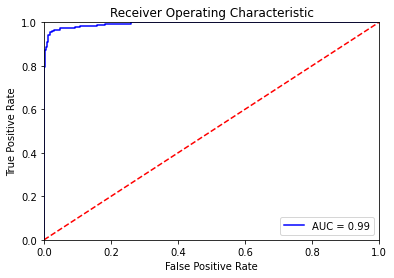

In [71]:
evaluate_roc(probs, y_val)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix
preds = probs[:, 1]
y_pred = np.where(preds >= 0.5, 1, 0)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       761
           1       0.94      0.95      0.95       249

    accuracy                           0.97      1010
   macro avg       0.96      0.96      0.96      1010
weighted avg       0.97      0.97      0.97      1010



In [74]:
print(confusion_matrix(y_val,y_pred))

[[747  14]
 [ 13 236]]


In [76]:
vnewData.loc[:,'predicted_value'] = y_pred

In [78]:
wrongPred = vnewData[vnewData['Mobile_Tech_Flag'] != vnewData['predicted_value']]

In [91]:
for i in range(len(wrongPred)):
  print(f'Text number {i} :',wrongPred.iloc[i,1])

Text number 0 : आपको यदि नकदी की विशेष जरूरत है और आप बैंक या एटीएम तक जाने में असमर्थ है तो घर पर बैंक को आमंत्रित कर सकते हैं.  इसके अलावा नकदी जमा करने, चेक देने, ड्राफ्ट की डिलीवरी, टर्म डिपॉजिट एडवाइज की डिलीवरी, लाइफ सर्टिफिकेट और केवाईसी डॉक्यूमेंट समेत अन्य सुविधाएं भी आपको घर बैठे मिल सकता है.  इसके लिए आपको टोल फ्री नंबर 1800111103 पर कॉल करना होगा.  यह एक रिक्वेस्ट प्रोसेस है जिसके बाद बैंक आपके द्वार पर कार्यकारी दिन सुबह 9:00 बजे से शाम 4:00 बजे तक आ सकता है.  हालांकि, इन सुविधाओं का आपको लाभ उठाना है तो आपको रजिस्ट्रेशन सीधे तौर पर होम ब्रांच पर करवाना होगा.  यह डोर स्टेप बैंकिंग सुविधा केवल और केवल उन्हीं ग्राहकों के लिए है जिनकी केवाईसी कंप्लीट है अर्थात जिन्होंने अपना केवाईसी डॉक्यूमेंट बैंक को सबमिट कर दिया है.  आपको बता दें कि आप यदि होम ब्रांच से 5 किलोमीटर के दायरे में आते हैं तो ही आप इस सुविधा के हकदार है.  इसके लिए आपको अपने रजिस्टर नंबर से कॉल करके रिक्वेस्ट भेजना होगा.  हालांकि, ज्वाइंट अकाउंट वाले ग्राहक इन सुविधाओं का लाभ बिल्कुल नहीं मिल पाएगा.  इसके अलावा 